# ExMatrix Method

For presenting the method, we utilize the Iris Dataset.

***Cite us***:  M. Popolin Neto and F. V. Paulovich, "Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles," in IEEE Transactions on Visualization and Computer Graphics, vol. 27, no. 2, pp. 1427-1437, Feb. 2021, doi: 10.1109/TVCG.2020.3030354.

***BibTeX:*** @article{PopolinNeto:2020:ExMatrix,
    author={Popolin{ }Neto, Mário and Paulovich, Fernando V.},
    journal={IEEE Transactions on Visualization and Computer Graphics}, 
    title={Explainable Matrix - Visualization for Global and Local Interpretability of Random Forest Classification Ensembles}, 
    year={2021},
    volume={27},
    number={2},
    pages={1427-1437},
    doi={10.1109/TVCG.2020.3030354}}
    
***WARNING***: The code below must be used along with exmatrix package version **0.1.0**. 

Improvements and naive bugs have been addressed in new versions. Thus, such new versions will require specific changes in the code and will generate slightly different visualizations. At last, it is recommended the usage of the latest version.

It is worth mentioning that starting from version **0.1.3** rule property "coverage" was renamed to "support" to be consistent with logic rules literature.


In [1]:
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


dataset = datasets.load_iris()

X = dataset.data
y = dataset.target

feature_names = dataset.feature_names
target_names = dataset.target_names


sss = list( StratifiedShuffleSplit( n_splits = 1, test_size = 0.30, random_state = 68269 ).split( X, y ) )
train_indexes = sss[ 0 ][ 0 ]
test_indexes = sss[ 0 ][ 1 ]

X_train, X_test = X[ train_indexes ], X[ test_indexes ]
y_train, y_test = y[ train_indexes ], y[ test_indexes ]


kargs = eval( "{'criterion': 'gini', 'n_estimators': 3, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 68269, 'bootstrap': False}" )
clf = RandomForestClassifier( **kargs )
clf.fit( X_train, y_train )


y_true, y_pred = y_test, clf.predict( X_test )
accuracy = accuracy_score( y_true, y_pred )
print( 'accuracy RF-3', accuracy )

accuracy RF-3 0.9555555555555556


In [2]:
from exmatrix import ExplainableMatrix

exm = ExplainableMatrix( n_features = len( feature_names ), n_classes = len( target_names ), feature_names = np.array( feature_names ), class_names = np.array( target_names ) )
exm.rule_extration( clf, X, y, clf.feature_importances_ )
print( 'n_rules RF-3', exm.n_rules_ )

n_rules RF-3 12


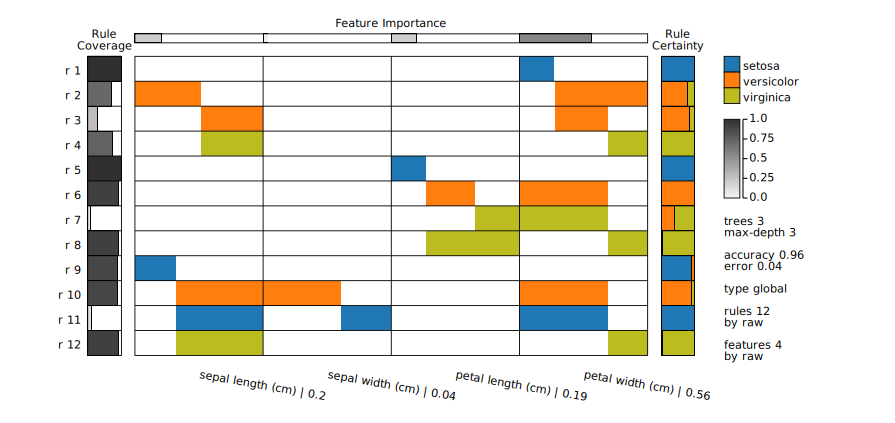

In [3]:
exp = exm.explanation( info_text = '\ntrees 3\nmax-depth 3\n\naccuracy 0.96\nerror 0.04\n' )
exp.create_svg( draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1990, height = 940, margin_bottom = 150 )
exp.save( 'IrisFlowerGE.png', pixel_scale = 5 )
exp.save( 'IrisFlowerGE.svg' )
exp.display_jn()

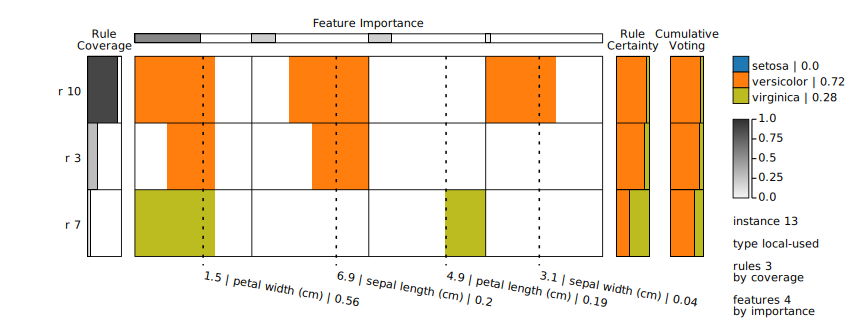

In [4]:
exp = exm.explanation( exp_type = 'local-used', x_k = X_test[ 13 ], r_order = 'coverage', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 720, margin_bottom = 150 )
exp.save( 'IrisFlowerLEUR-13.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLEUR-13.svg' )
exp.display_jn()

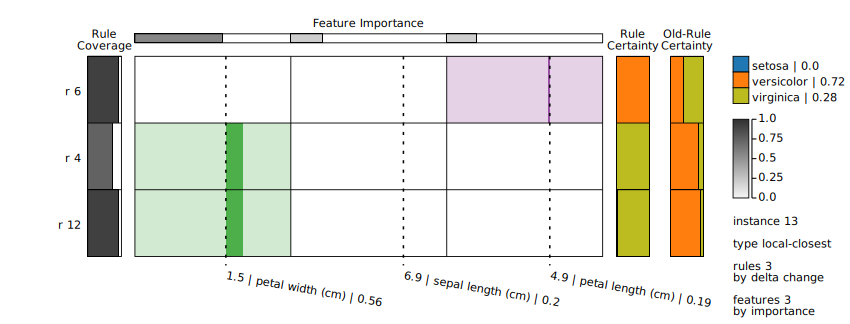

In [5]:
exp = exm.explanation( exp_type = 'local-closest', x_k = X_test[ 13 ], r_order = 'delta change', f_order = 'importance', info_text = '\ninstance 13\n' )
exp.create_svg( draw_x_k = True, draw_deltas = True, cell_background = True, draw_row_labels = True, draw_col_labels = True, draw_rows_line = True, draw_cols_line = True, col_label_degrees = 10, width = 1890, height = 720, margin_bottom = 150 )
exp.save( 'IrisFlowerLESC-13.png', pixel_scale = 5 )
exp.save( 'IrisFlowerLESC-13.svg' )
exp.display_jn()